In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import count_nonzero
%matplotlib inline
from scipy import stats


In [2]:
Patients_df = pd.read_excel('HospitalDatabase.xlsx','Patients')

In [3]:
ReAdmission_df=pd.read_excel("HospitalDatabase.xlsx",'ReAdmissionRegistry')

In [77]:
EDVisits_df = pd.read_excel('HospitalDatabase.xlsx','EDVisits')

In [5]:
AmbulatoryVisits_df = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')

In [6]:
Discharges_df =  pd.read_excel('HospitalDatabase.xlsx','Discharges')

In [7]:
EDUnique_df =  pd.read_excel('HospitalDatabase.xlsx','EDUnique')

### Q21.Which demographic patients are prone to get stroke

In [8]:
Patientid_stroke = ReAdmission_df['PatientID'][ReAdmission_df.PrimaryDiagnosis =='Stroke']
Patients_detail = Patients_df.iloc[:,0:6][Patients_df['PatientID'].isin(Patientid_stroke)]

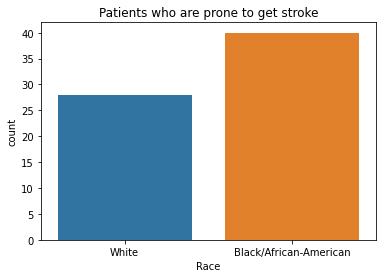

In [55]:
sns.countplot(x='Race', data =Patients_detail)
plt.title('Patients who are prone to get stroke')
plt.show()

## Graph shows Black/African American is more prone to get stroke

### Q22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value


In [81]:
count_patient_df_2= EDVisits_df.groupby(['EDDisposition','Acuity'],as_index=True)['PatientID'].count()
count_patient_df_2

EDDisposition  Acuity
Admitted       1          32
               2         116
               3          81
               4         107
               5         179
Discharged     1         558
               2          66
               4          30
               5          30
Name: PatientID, dtype: int64

### We have tried as_index=false and .set_index() to set index manually outside the group by


In [78]:
# used groupby() to get the count of patients and writing it to dataframe
data= EDVisits_df.groupby(['EDDisposition','Acuity'],as_index=False)['PatientID'].count()
count_patient_df = pd.DataFrame(data)

In [79]:
# setting index on EDDisposition and Acuity
count_patient_df = count_patient_df.set_index(['EDDisposition','Acuity'])

In [80]:
# printing the values
count_patient_df

PatientID
EDDisposition Acuity           
Admitted      1              32
              2             116
              3              81
              4             107
              5             179
Discharged    1             558
              2              66
              4              30
              5              30

### Q23.Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list)


In [13]:
def findMiddle(input_list):
    middle = float(len(input_list))/2
    if middle % 2 != 0:
        return input_list[int(middle - .5)]
    else:
        return (input_list[int(middle-1)],input_list[int(middle)])

input_list=list(input("enter some numbers:"))
findMiddle(input_list)

enter some numbers:1589


('5', '8')

### Q24.Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

In [15]:
data = EDVisits_df.groupby(['EDDisposition','ReasonForVisit'],as_index=False)['PatientID'].count()
stack_df = pd.DataFrame(data)

Stack_pivot_df =stack_df.pivot(index='EDDisposition',columns = ['ReasonForVisit'],values='PatientID')
Stack_pivot_df

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


In [16]:
Stack_pivot_df.stack()

EDDisposition  ReasonForVisit     
Admitted       Accident                39.0
               Bleeding                16.0
               Car Accident            17.0
               Chest Pain              94.0
               Fever                   46.0
               Gun Shot                16.0
               Migraine                47.0
               Pneumonia              136.0
               Shortness of Breath     72.0
               Stomach Ache            32.0
Discharged     Bleeding                15.0
               Chest Pain              15.0
               Cough                    1.0
               Fever                  188.0
               Intoxication            30.0
               Laceration              30.0
               Migraine               109.0
               Pneumonia               65.0
               Shortness of Breath     77.0
               Stomach Ache           154.0
dtype: float64

## Stacked output

In [17]:
stacked_df = Stack_pivot_df.stack()
stacked_df.unstack()

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


## Unstacked output

### Q25.Plot a graph by counting the no. of patients in each department

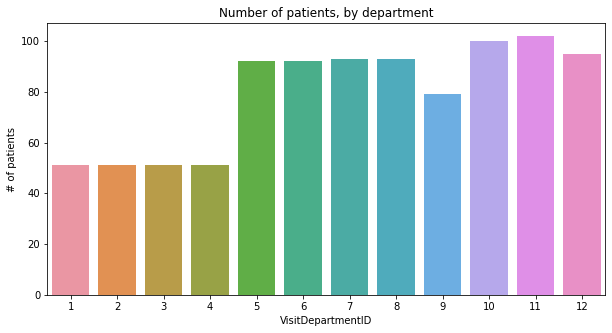

In [63]:
plt.figure(figsize = (10,5))
sns.countplot(x='VisitDepartmentID',data = AmbulatoryVisits_df)
plt.title('Number of patients, by department')
plt.ylabel('# of patients')
plt.show()

### Q26. Using Arrays and Loops, find the count of of patients based on gender

In [54]:
a=np.array(Patients_df['Gender'])
m_value=0
f_value=0
for i in a:
    if i == 'Male':
        m_value = 1 + m_value
    else:  
        f_value = 1 + f_value
print( 'count of Male Patients :',m_value)
print( 'count of Female Patients :',f_value)

count of Male Patients : 537
count of Female Patients : 408


### Q27.Plot a graph to count the patients based on discharge disposition

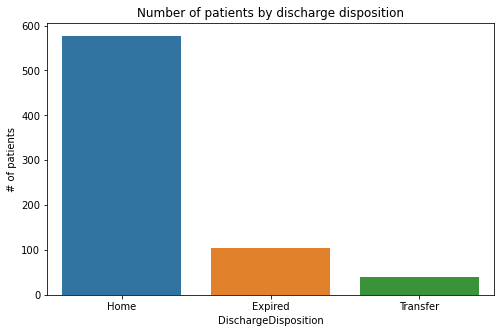

In [64]:
plt.figure(figsize = (8,5))
sns.countplot(x='DischargeDisposition',data =ReAdmission_df)
plt.title('Number of patients by discharge disposition')
plt.ylabel('# of patients')
plt.show()

### Q28.Which reason of visit has maximum mortality rate

In [21]:
Patient_count= Discharges_df.groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
# this is to get total number of patients for each PrimaryDiagnosis
Patient_count.rename(columns={"PatientID":"Total_count"},inplace = True)
Expired_patient_count = Discharges_df[(Discharges_df.DischargeDisposition=='Expired')].groupby(['PrimaryDiagnosis'],as_index=False)['PatientID'].count()
Expired_patient_count.rename(columns={"PatientID":"Death_count"},inplace = True)
# Merging the file on PrimaryDiagnosis column
Patient_count_df = pd.merge(Patient_count,Expired_patient_count, on = "PrimaryDiagnosis", how = 'left')
Patient_count_df['Death_count'].fillna(value=0, inplace=True)
#calculation actual Morality rate
Patient_count_df['Mortality_rate']=Patient_count_df['Death_count']/Patient_count_df['Total_count']


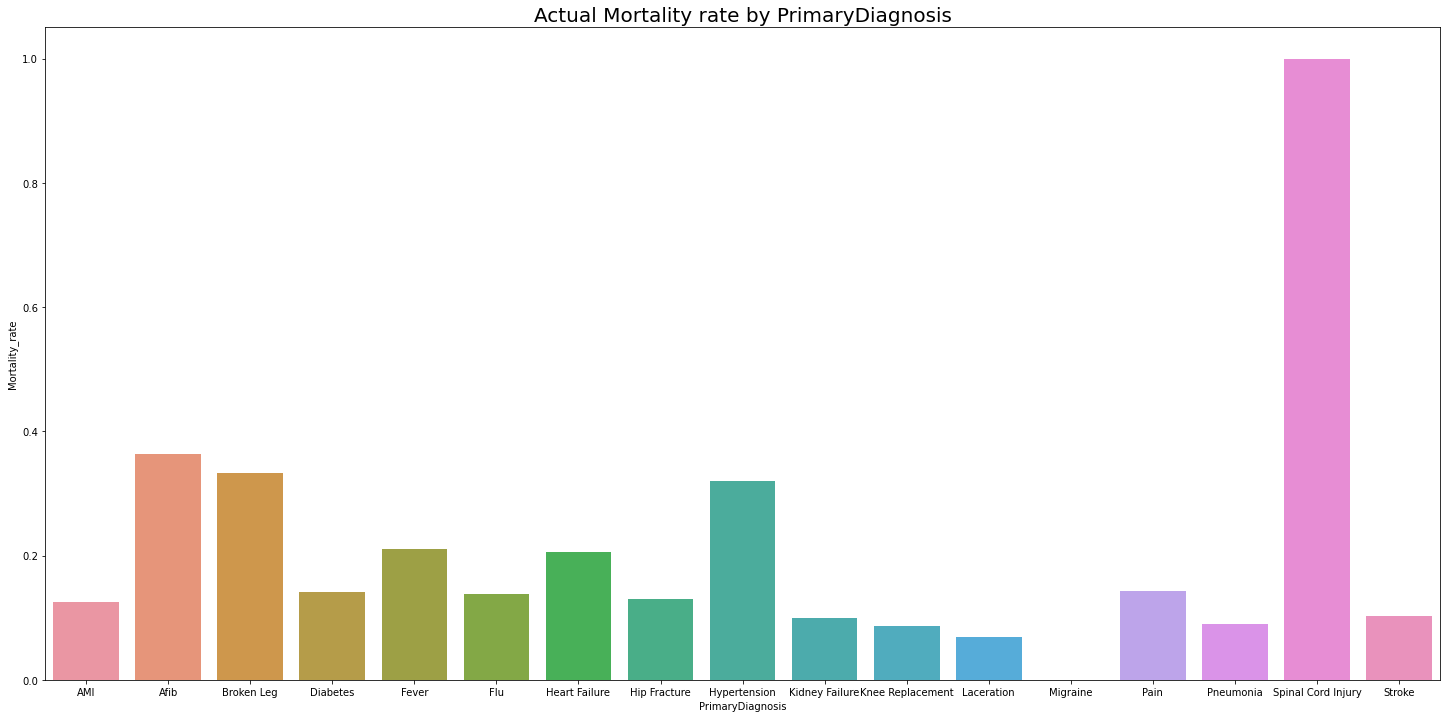

In [52]:
plt.figure(figsize = (25,12))
sns.barplot(x='PrimaryDiagnosis',y='Mortality_rate',data = Patient_count_df)
plt.title('Actual Mortality rate by PrimaryDiagnosis',fontsize=20)
plt.show()

### Spinal Cord Injury has high Mortality rate

### Q29. Calculate average LOS

In [66]:
#average Los is calculated by using mean() function on 'ExpectedLOS' column
avg_LOS = Discharges_df['ExpectedLOS'].mean()
print('Average LOS is :',avg_LOS)

Average LOS is : 8.82458915915616


In [25]:
#To verify we cross checked with describe()
Discharges_df['ExpectedLOS'].describe()

count    720.000000
mean       8.824589
std        4.034421
min        2.012974
25%        5.138501
50%        8.633825
75%       12.107623
max       16.998213
Name: ExpectedLOS, dtype: float64

### Q30.Which patientid has most entries in readmission registry

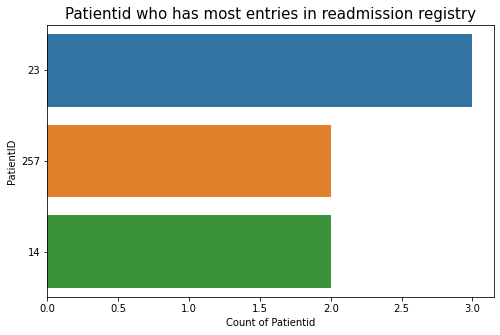

In [70]:
# used the count plot and ordered by value_counts() to get top 3 records.
plt.figure(figsize = (8,5))
sns.countplot(y='PatientID', data =ReAdmission_df, order= ReAdmission_df.PatientID.value_counts().iloc[:3].index)
plt.xlabel('Count of Patientid')
plt.title('Patientid who has most entries in readmission registry',fontsize=15)
plt.show()

## From the above graph, PatientID 23 has most entries in readmission registry

### Q31.Find count of White Spanish Male

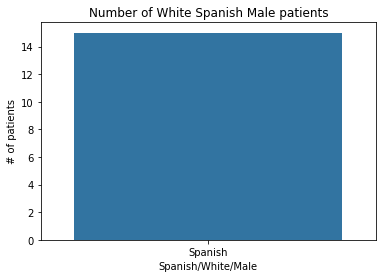

In [29]:
sns.countplot(x='Language',data =Patients_df[(Patients_df.Gender == 'Male') & (Patients_df.Race =='White') &(Patients_df.Language == 'Spanish') ] )
plt.title('Number of White Spanish Male patients')
plt.xlabel('Spanish/White/Male')
plt.ylabel('# of patients')
plt.show()

## the Graph Shows we have 15 Patients who are White Spanish Male

In [30]:

Patients_df.PatientID[(Patients_df.Gender == 'Male') & (Patients_df.Race =='White') &(Patients_df.Language == 'Spanish')] .count()

15

## cross verified against dataframe 

### Q32.Write a function to print the table of the given number

In [31]:
def print_table(num, start, end): 
    """ This function prints multiplication table of a given number"""
    for i in range(start, end+1): 
        print(num,' x ', i, ' = ',num*i) 
# end of function table


# input a number
n = int(input("Please Enter a number to print its multiplication table:"))
start = int(input("Enter  start value to start printing table from:"))
end =  int(input("Enter  end value to stop printing table:"))
# call the function table by passing actual parameter 'n' 

print_table(n, start, end)


Please Enter a number to print its multiplication table:9
Enter  start value to start printing table from:1
Enter  end value to stop printing table:15
9  x  1  =  9
9  x  2  =  18
9  x  3  =  27
9  x  4  =  36
9  x  5  =  45
9  x  6  =  54
9  x  7  =  63
9  x  8  =  72
9  x  9  =  81
9  x  10  =  90
9  x  11  =  99
9  x  12  =  108
9  x  13  =  117
9  x  14  =  126
9  x  15  =  135


### Q33. Using a bar chart, which Service had the lowest count of Expected Mortality?

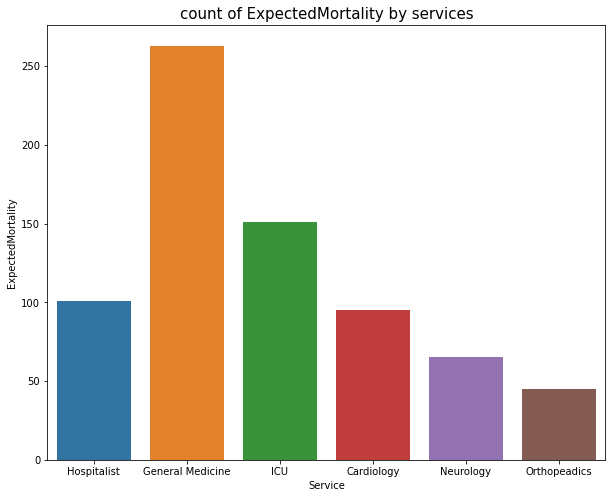

In [51]:
plt.figure(figsize = (10,8))
sns.barplot(x='Service', y ='ExpectedMortality', data = ReAdmission_df, estimator= count_nonzero)
plt.title('count of ExpectedMortality by services',fontsize =15)
plt.show()

## from the above bar chart we come to know Orthopeadics Service had the lowest count of Expected Mortality

### q34.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17

In [33]:
a=np.arange(1,31).reshape(6,5)
a[2:4,0:2]

array([[11, 12],
       [16, 17]])

### 35.np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20

In [34]:
a=np.arange(1,31).reshape(6,5)
print(a[(0,1)])

2


In [35]:
print(a[(1,2)])

8


In [36]:
print(a[(2,3)])

14


In [37]:
print(a[(3,4)])

20


In [38]:
# another method to print 2,8,14,20
a[[0,1,2,3],[1,2,3,4]]

array([ 2,  8, 14, 20])

### Q36 Create a correlation matrix on EDVisits

In [72]:
EDVisits_corr_df=EDVisits_df

In [73]:
EDVisits_corr_df['EDDisposition'] = np.where((EDVisits_corr_df.EDDisposition == 'Admitted'),1,0)


In [74]:
cc=EDVisits_corr_df.corr()
cc

,EDVisitID,PatientID,Acuity,EDDisposition,time difference
EDVisitID,1.000000,0.975477,0.005813,NaN,0.015873
PatientID,0.975477,1.000000,0.003545,NaN,0.020262
Acuity,0.005813,0.003545,1.000000,NaN,-0.033968
EDDisposition,NaN,NaN,NaN,NaN,NaN
time difference,0.015873,0.020262,-0.033968,NaN,1.000000


### there is only 1 numeric column to find the correlation, so tried to change EDDispotion to numeric. from above correlation matrix we couldnt say which is correlated. but EDDispotion and Acuty is slightly correlated. 

In [75]:
EDVisits_corr_df['time difference'] =(EDVisits_corr_df['EDDischargeTime']-EDVisits_corr_df['VisitDate']).dt.total_seconds() / 60 / 60

In [76]:
EDVisits_corr_df.corr()

,EDVisitID,PatientID,Acuity,EDDisposition,time difference
EDVisitID,1.000000,0.975477,0.005813,NaN,0.015873
PatientID,0.975477,1.000000,0.003545,NaN,0.020262
Acuity,0.005813,0.003545,1.000000,NaN,-0.033968
EDDisposition,NaN,NaN,NaN,NaN,NaN
time difference,0.015873,0.020262,-0.033968,NaN,1.000000


### tried to check correlation including length of stay but it is not correlated.EDDisposition & Acuity is slightly correlated.

### 37.Write a function to print all the upper case letter of a given sentence

In [43]:
# Python program to print uppercase letters in the string

# take input
string = input('Enter any string: ')

upper = ''
for char in string:
    #check uppercase characters
    if char.isupper():
        upper += char

# print uppercase characters
print('Uppercase characters:', upper)

Enter any string: adErRtGY
Uppercase characters: ERGY


### Q38. Number of patients on 'Transfer' based on primary diagnosis

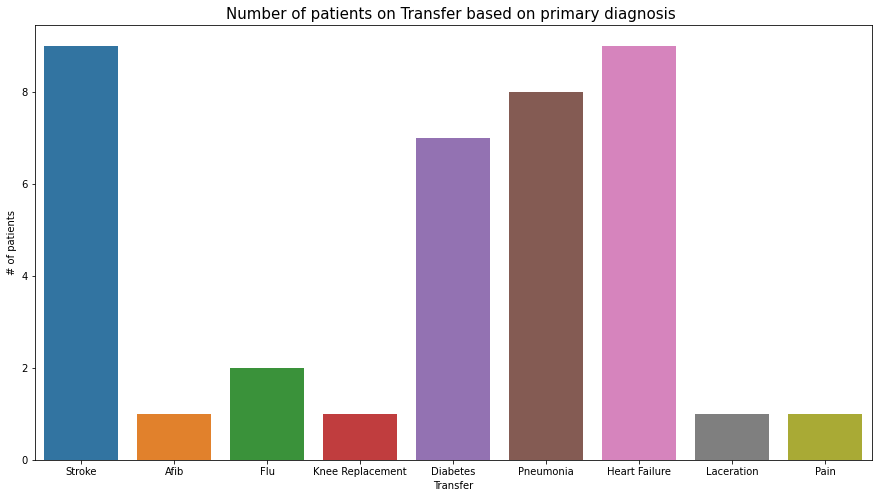

In [50]:
plt.figure(figsize = (15,8))
sns.countplot(x='PrimaryDiagnosis',data =ReAdmission_df[(ReAdmission_df.DischargeDisposition == 'Transfer')])
plt.title('Number of patients on Transfer based on primary diagnosis ',fontsize=15)
plt.xlabel('Transfer')
plt.ylabel('# of patients')
plt.show()

### Q39.Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine

In [45]:
#Filtering data on Migraine
Pid_Migraine = EDUnique_df['PatientID'][(EDUnique_df.ReasonForVisit == 'Migraine') ]

In [46]:
# to display number of Patients who has Migraine and valided against data set
Pid_Migraine.count()

116

In [47]:
# Passing those Patient_id to Patient table and getting their details. 
Patients_df.iloc[:,1:4][Patients_df['PatientID'].isin(Pid_Migraine)]

,FirstName,LastName,DateOfBirth
1,Far,Myers,1985-11-15 02:08:42.090
2,Devlin,Michael,1976-04-15 02:52:09.762
11,Zonnya,Ab,1963-05-23 10:04:33.074
13,Gan,Yu,1970-06-02 06:22:54.675
21,Joesph,Long,1979-12-04 16:45:56.080
...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483
907,Knox,Group,1975-08-25 22:27:50.177
909,Kuvalis,Coupland,1986-05-23 19:23:27.752
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178


## Verified it gets only details of 116 records who have Migraine.

### Q40. Plot a graph showing the count of patients for the reason visited the hospital.

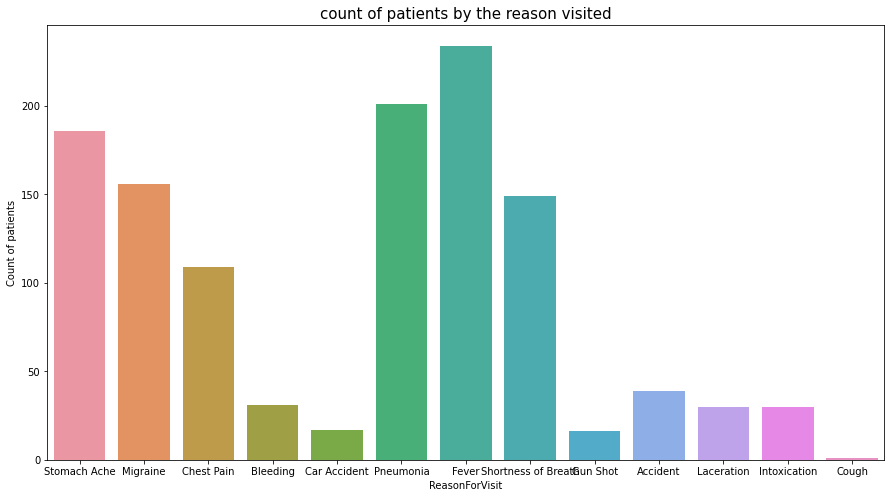

In [71]:
plt.figure(figsize = (15,8))
sns.countplot(x='ReasonForVisit',data=EDVisits_df)

plt.ylabel('Count of patients')
plt.title('count of patients by the reason visited',fontsize=15)
plt.show()
